In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [14]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [15]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


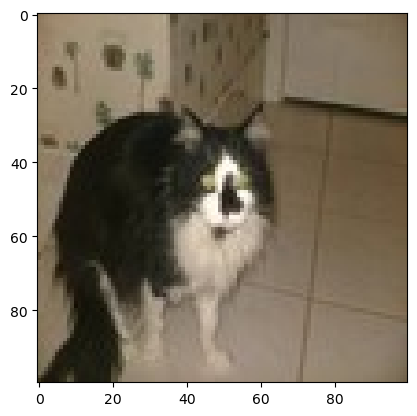

In [17]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [18]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 10s 283ms/step - loss: 0.7053 - accuracy: 0.5080
Epoch 2/5
32/32 [==============================] - 8s 263ms/step - loss: 0.6758 - accuracy: 0.5695
Epoch 3/5
32/32 [==============================] - 9s 273ms/step - loss: 0.6090 - accuracy: 0.6760
Epoch 4/5
32/32 [==============================] - 8s 264ms/step - loss: 0.5546 - accuracy: 0.7285
Epoch 5/5
32/32 [==============================] - 9s 266ms/step - loss: 0.5087 - accuracy: 0.7615


In [22]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 37ms/step - loss: 0.5954 - accuracy: 0.6875


[0.5953629612922668, 0.6875]

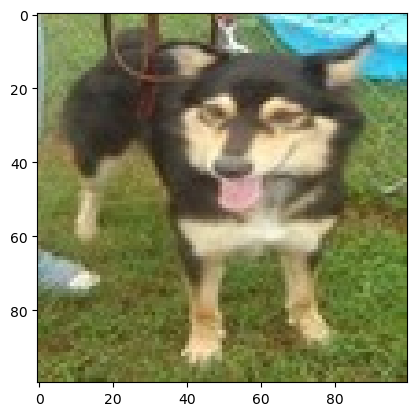

1/1 [==============================] - 0s 47ms/step
Our model says it is a : dog


In [23]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)

In [24]:
tf.keras.models.save_model(model,'CNNImageClassification.hdf5')

<IPython.core.display.Javascript object>

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17892\1037017943.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'CNNImageClassification.hdf5')


In [32]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
import cv2
import numpy as np


model = tf.keras.models.load_model('CNNImageClassification.hdf5')

def classify_image(image_bytes):
   
    image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), -1)

    
    image = cv2.resize(image, (100, 100))  
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)

   
    prediction = model.predict(image)[0]
    class_names = ['Cat', 'Dog']  

    return class_names[np.argmax(prediction)], prediction[np.argmax(prediction)]


st.title("Cat vs. Dog Image Classifier")
st.subheader("Using a Convolutional Neural Network")

uploaded_file = st.file_uploader("Choose an image...", type=['jpg', 'png'])

if uploaded_file is not None:
    image_bytes = uploaded_file.read()

    prediction, probability = classify_image(image_bytes)

    
    st.image(image_bytes)
    st.write(f"Predicted: {prediction} with {probability:.2f} confidence")



Overwriting app.py
